In [1]:
import pandas as pd

# Load the CSV file
file_path = 'Disease and Symptoms.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import json

# Convert each row into the desired JSON format
json_data = []
for _, row in data.iterrows():
    disease = row['Disease']
    symptoms = row[1:].dropna().tolist()  # Drop any NaN values from symptoms columns
    json_data.append({
        "symptoms": symptoms,
        "disease": disease
    })

# Save the JSON data to a file
output_path = 'Disease and Symptoms.json'
with open(output_path, 'w') as f:
    json.dump(json_data, f, indent=4)

output_path

In [ ]:
# Load the new CSV file
file_path = 'SymbiPredict 2022.csv'
data_new = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data_new.head()


In [ ]:
# Extract symptom columns and the prediction column
symptom_columns = data_new.columns[:-1]  # All columns except the last one (prognosis/prediction)
prediction_column = data_new.columns[-1]  # The last column

# Convert each row into the desired JSON format
json_data_new = []
for _, row in data_new.iterrows():
    disease = row[prediction_column]
    symptoms = [symptom for symptom in symptom_columns if row[symptom] == 1]
    json_data_new.append({
        "symptoms": symptoms,
        "disease": disease
    })

# Save the JSON data to a file
output_path_new = 'SymbiPredict Disease and Symptoms.json'
with open(output_path_new, 'w') as f:
    json.dump(json_data_new, f, indent=4)

output_path_new


In [ ]:
# Load the previously created JSON files
with open('/mnt/data/Disease_and_Symptoms.json') as f1:
    json_data_1 = json.load(f1)

with open('/mnt/data/SymbiPredict_Disease_and_Symptoms.json') as f2:
    json_data_2 = json.load(f2)

# Combine the two JSON data lists
combined_json_data = json_data_1 + json_data_2

# Save the combined JSON data to a new file
combined_output_path = '/mnt/data/Combined_Disease_and_Symptoms.json'
with open(combined_output_path, 'w') as f:
    json.dump(combined_json_data, f, indent=4)

combined_output_path


In [9]:
import json
import matplotlib.pyplot as plt
from collections import Counter

In [10]:
# Load the JSON file
file_path = 'Final_Data_Symptom_Analysis.json'  # replace with your file path
with open(file_path, 'r') as f:
    data = json.load(f)

In [11]:
# Compute disease occurrence statistics
disease_counts = Counter(entry["disease"] for entry in data)

# Compute symptom frequency statistics
symptom_counts = Counter(symptom for entry in data for symptom in entry["symptoms"])

# Number of symptoms per disease
symptoms_per_disease = [len(entry["symptoms"]) for entry in data]

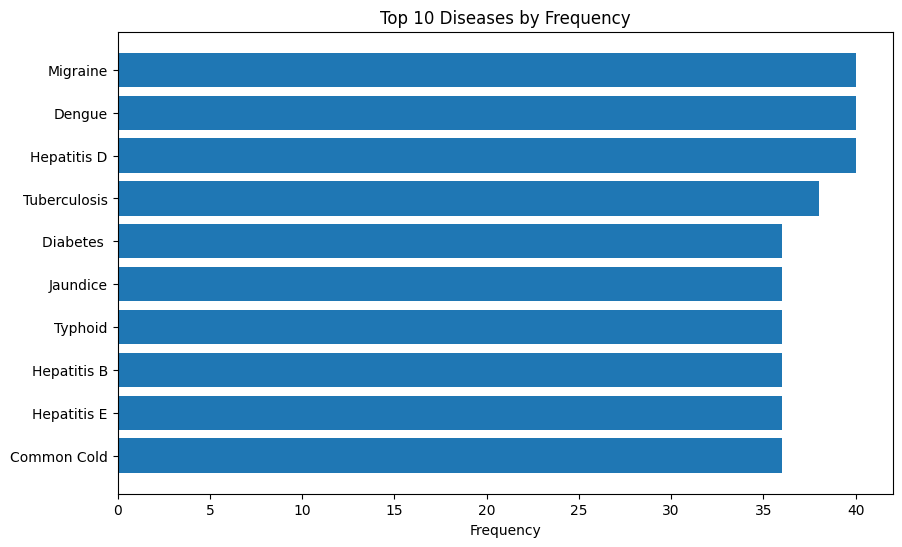

In [12]:
# Visualization 1: Top 10 diseases by occurrence
top_diseases = disease_counts.most_common(10)
diseases, counts = zip(*top_diseases)
plt.figure(figsize=(10, 6))
plt.barh(diseases, counts)
plt.xlabel('Frequency')
plt.title('Top 10 Diseases by Frequency')
plt.gca().invert_yaxis()
plt.show()

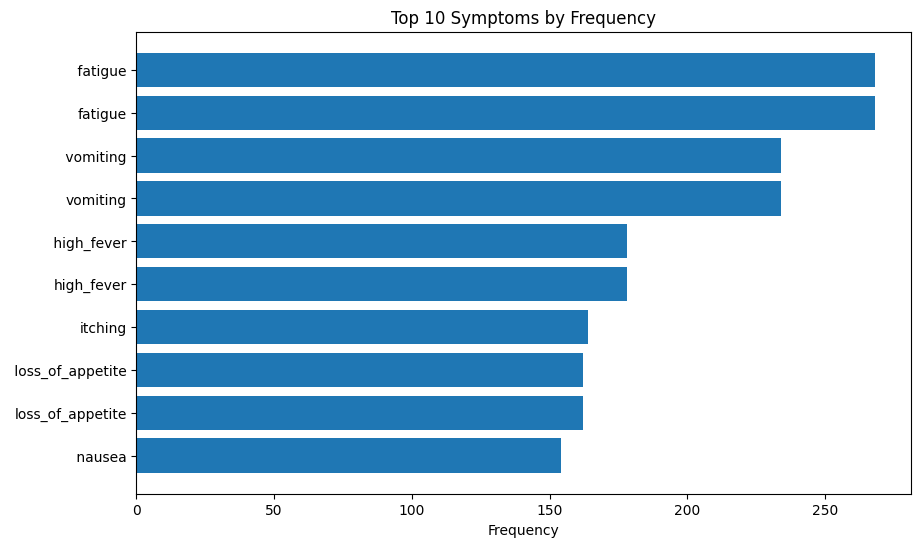

In [13]:
# Visualization 2: Top 10 symptoms by frequency
top_symptoms = symptom_counts.most_common(10)
symptoms, freq = zip(*top_symptoms)
plt.figure(figsize=(10, 6))
plt.barh(symptoms, freq)
plt.xlabel('Frequency')
plt.title('Top 10 Symptoms by Frequency')
plt.gca().invert_yaxis()
plt.show()

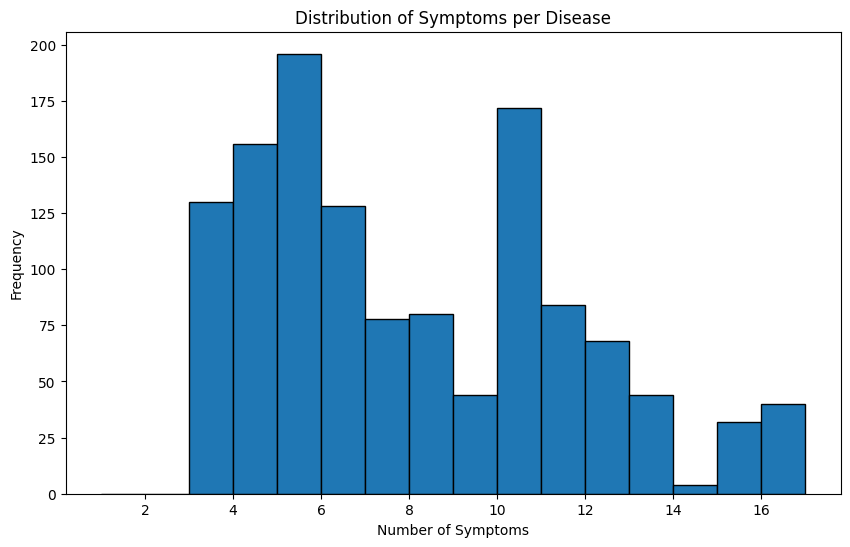

In [14]:
# Visualization 3: Distribution of number of symptoms per disease
plt.figure(figsize=(10, 6))
plt.hist(symptoms_per_disease, bins=range(1, max(symptoms_per_disease) + 1), edgecolor='black')
plt.xlabel('Number of Symptoms')
plt.ylabel('Frequency')
plt.title('Distribution of Symptoms per Disease')
plt.show()

In [15]:
# Additional statistics
print(f"Total unique diseases: {len(disease_counts)}")
print(f"Total unique symptoms: {len(symptom_counts)}")
print(f"Average number of symptoms per disease: {sum(symptoms_per_disease) / len(symptoms_per_disease):.2f}")

Total unique diseases: 71
Total unique symptoms: 351
Average number of symptoms per disease: 7.61
